In [3]:
import pandas as pd

triplet_scores = pd.read_csv('ThreeDrugCombs.csv')
triplet_scores

,Drug1,Drug2,Drug3,Drug1 Concentration,Drug2 Concentration,Drug3 Concentration,Small Mol Conc Unit,Replicate,Total Number of Cells (Nuclei),Number of Apoptotic Cells,Relative Viability,Mean Relative Viability,Apoptosis Fraction,Mean Apoptosis Fraction,Cell Name
0,Vemurafenib,Trametinib,Dasatinib,0.00,0.000,0.000,uM,1,15785,755,0.9659,1.0000,0.0478,0.0508,A-375
1,Vemurafenib,Trametinib,Dasatinib,0.00,0.000,0.000,uM,2,15978,849,0.9722,1.0000,0.0531,0.0508,A-375
2,Vemurafenib,Trametinib,Dasatinib,0.00,0.000,0.000,uM,3,17422,897,1.0619,1.0000,0.0515,0.0508,A-375
3,Vemurafenib,Trametinib,Dasatinib,0.00,0.000,0.316,uM,1,3999,254,0.2407,0.2809,0.0635,0.0601,A-375
4,Vemurafenib,Trametinib,Dasatinib,0.00,0.000,0.316,uM,2,4717,279,0.2852,0.2809,0.0591,0.0601,A-375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,Vemurafenib,Trametinib,I-BET151,3.16,0.316,0.000,uM,2,1353,550,0.2330,0.2080,0.4065,0.4511,WM-115
1856,Vemurafenib,Trametinib,I-BET151,3.16,0.316,0.000,uM,3,1297,614,0.1982,0.2080,0.4734,0.4511,WM-115
1857,Vemurafenib,Trametinib,I-BET151,3.16,0.316,1.000,uM,1,775,600,0.0508,0.0514,0.7742,0.7604,WM-115
1858,Vemurafenib,Trametinib,I-BET151,3.16,0.316,1.000,uM,2,737,556,0.0525,0.0514,0.7544,0.7604,WM-115


In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import matplotlib.pyplot as plt

def plot_grid(measure_name):
    axes = []
    fig = plt.figure(figsize=(20, 15))

    # Check how many combinations were tested
    for i, vals in enumerate(triplet_scores.groupby(['Drug1 ', 'Drug2', 'Drug3'])): 
        name, group = vals
        
        ax = fig.add_subplot(3, 3, i + 1, projection='3d')
        cmap = plt.get_cmap("viridis")
        norm = colors.Normalize(vmin=min(group[measure_name]), vmax=max(group[measure_name]))
        scat = ax.scatter(group['Drug1 Concentration'], group['Drug2 Concentration'], 
                          group['Drug3 Concentration'], c=cmap(norm(group[measure_name])))

        ax.set_xlabel('D1 Conc uM')
        ax.set_ylabel('D2 Conc uM')
        ax.set_zlabel('D3 Conc uM')
        
        ax.title.set_text('%s, %s, %s' %  name)
        axes.append(ax)

    cb = fig.colorbar(scat, ax=axes)
    cb.ax.set_ylabel(measure_name, fontsize='x-large')
    fig.suptitle('%s Across Different Combinations' % measure_name, fontsize='xx-large')
    plt.savefig('%s.png' % measure_name)
    plt.show()

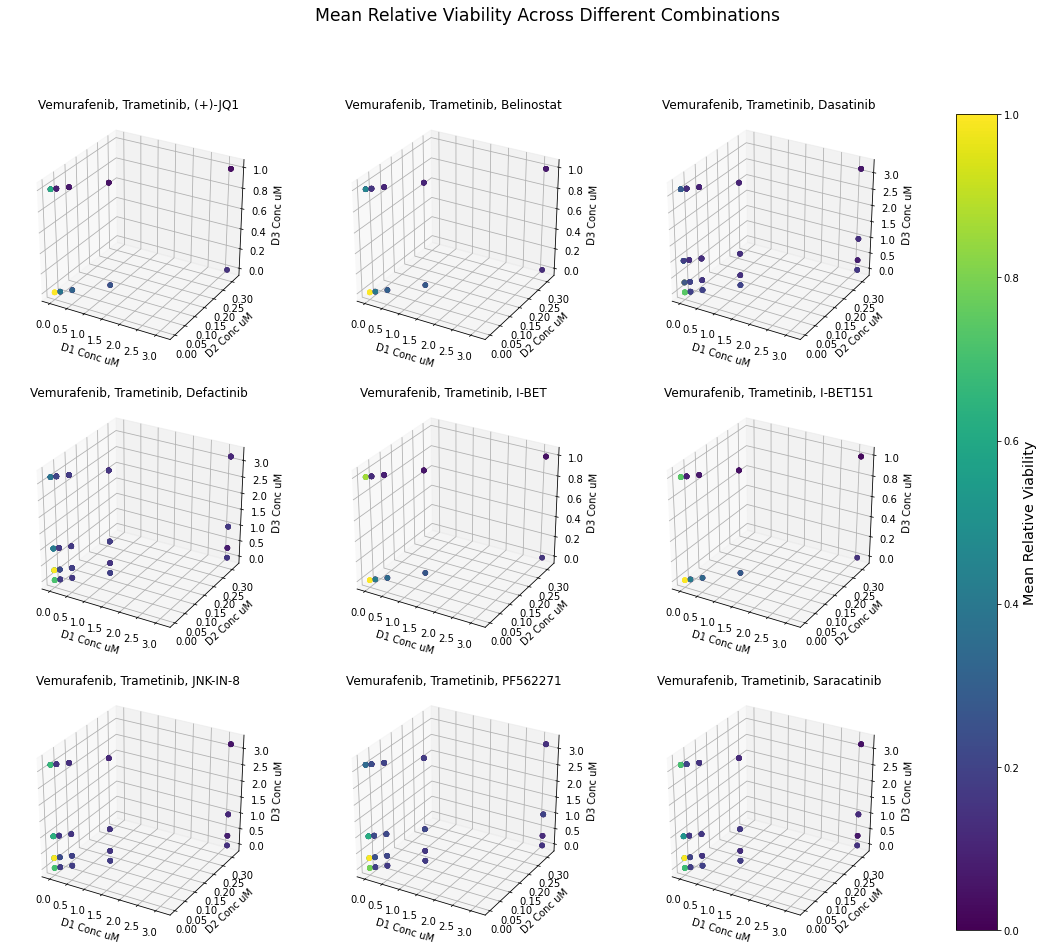

In [5]:
plot_grid('Mean Relative Viability')

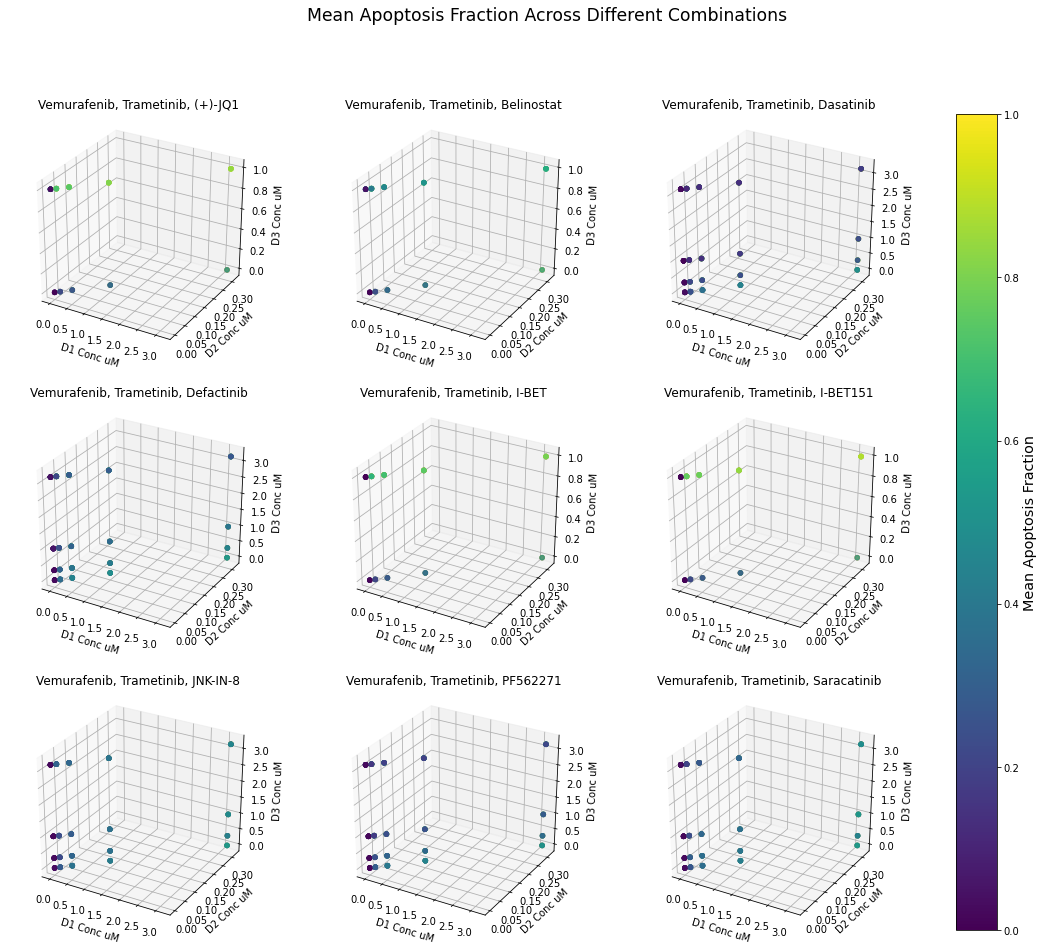

In [6]:
plot_grid('Mean Apoptosis Fraction')